<a href="https://colab.research.google.com/github/aashimaekka/Unsupervised-ML---KMeans-vs-DBScan/blob/main/K_means_clustering_vs_DBscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore')

In [2]:
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.60,
                  random_state=42)

In [25]:
X

array([[ 0.83058575, -0.44773257],
       [ 0.70167816,  0.81691843],
       [ 1.02208004, -0.49257102],
       [-0.31676455,  0.95343844],
       [ 0.29322631,  1.05718523],
       [ 1.25490304, -0.48343549],
       [ 1.05385133, -0.44269047],
       [ 0.03137971,  1.05301203],
       [ 0.62054473,  0.71309598],
       [ 1.7876566 , -0.14295878],
       [ 0.99907493,  0.09180641],
       [-0.70723041,  0.57499903],
       [ 1.46479643, -0.47111862],
       [ 0.42712245,  0.83103216],
       [ 1.05341942, -0.50102941],
       [ 1.19597671, -0.49472393],
       [ 1.99422286,  0.42426007],
       [ 0.93175527,  0.39426183],
       [ 0.41104275, -0.33348189],
       [ 1.49073255, -0.38560138],
       [ 1.97517181,  0.35930615],
       [ 2.0470942 ,  0.41068552],
       [-0.00592133,  0.14862165],
       [ 0.82592072, -0.42998975],
       [ 0.54309448,  0.75144817],
       [ 1.8709548 ,  0.20141701],
       [ 1.9224317 ,  0.43263225],
       [-0.86765136,  0.45505598],
       [ 0.28216036,

In [3]:
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

In [4]:
df.head()

,Feature1,Feature2
0,-8.148764,6.901617
1,-8.497759,-6.912687
2,5.953761,1.488191
3,-2.744463,8.136177
4,-6.158899,-7.124955


In [5]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(df)

In [6]:
inertia = []
K_range = range(1,11)

In [7]:
inertia = [] # Clear the inertia list before appending
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [8]:
inertia

[999.9999999999991,
 546.5846235701698,
 102.86282066086986,
 10.602257105672479,
 9.788532453328468,
 8.609530283250395,
 7.64345505619612,
 6.609413246919947,
 6.211509253893227,
 5.669352232274697]

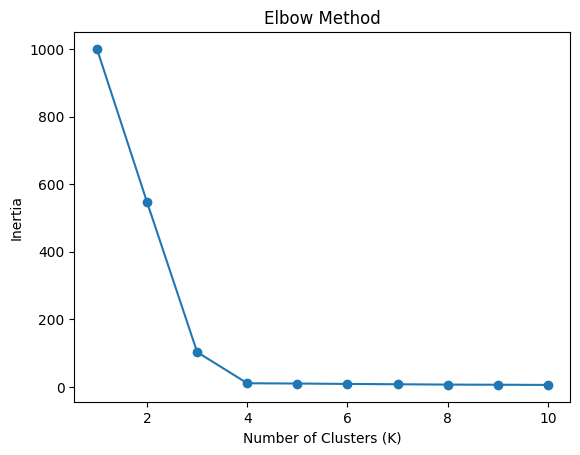

In [9]:
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [10]:
kmeans_final = KMeans(n_clusters=3, random_state=42)


In [11]:
cluster_labels = kmeans_final.fit_predict(X_scaled)


In [12]:
df['cluster'] = cluster_labels


<Axes: xlabel='Feature1', ylabel='Feature2'>

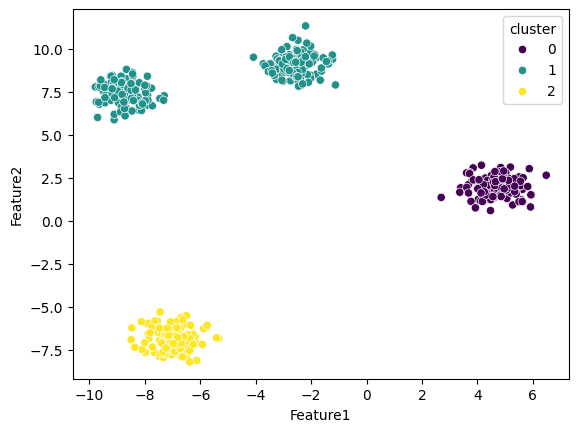

In [13]:
sns.scatterplot(x=df['Feature1'],
                y=df['Feature2'],
                hue=df['cluster'],
                palette='viridis')

Make moons

In [14]:
from sklearn.datasets import make_moons

In [15]:
X, y_true = make_moons(n_samples=500, noise=0.05, random_state=42)

In [16]:
from sklearn.cluster import KMeans, DBSCAN

In [17]:
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [19]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [20]:
df['kmeans_cluster'] = kmeans_labels


<Axes: xlabel='Feature1', ylabel='Feature2'>

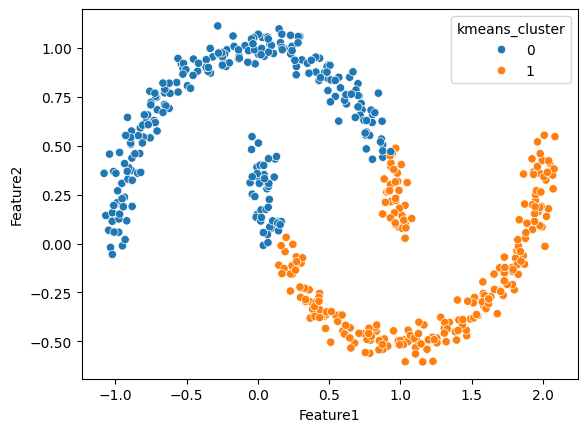

In [21]:
sns.scatterplot(x=df['Feature1'], y=df['Feature2'], hue=df['kmeans_cluster'], palette='tab10')

In [22]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [23]:
df['dbscan_cluster'] = dbscan_labels

<Axes: xlabel='Feature1', ylabel='Feature2'>

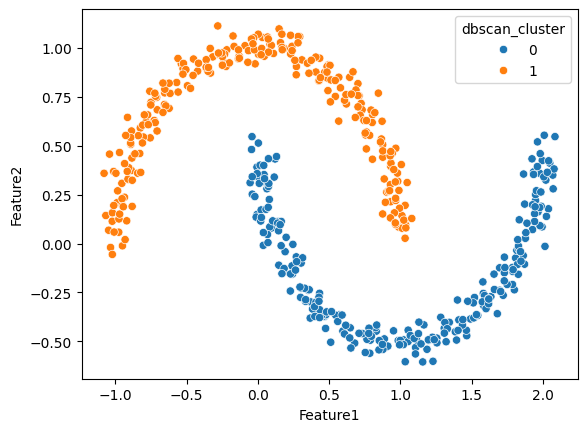

In [24]:
sns.scatterplot(x=df['Feature1'], y=df['Feature2'], hue=df['dbscan_cluster'], palette='tab10')